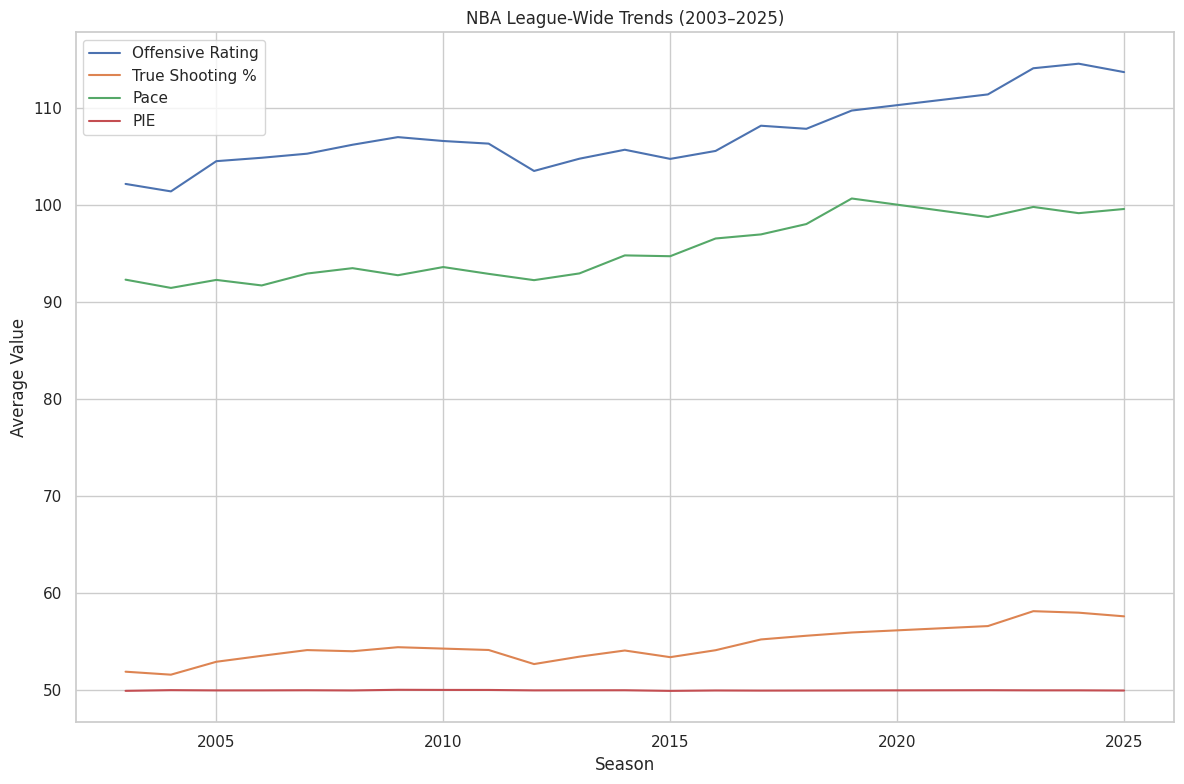

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your team stats dataset
df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv")  # Update path if needed

# 2. Convert year to int
df['Year'] = df['Year'].astype(int)

# 3. Group by year and average all team metrics for league-wide trends
league_trends = df.groupby('Year')[['OffRtg', 'TS_PCT', 'PACE', 'PIE']].mean().reset_index()

# 4. Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# 5. Plot with layered line plots
sns.lineplot(data=league_trends, x='Year', y='OffRtg', label='Offensive Rating')
sns.lineplot(data=league_trends, x='Year', y='TS_PCT', label='True Shooting %')
sns.lineplot(data=league_trends, x='Year', y='PACE', label='Pace')
sns.lineplot(data=league_trends, x='Year', y='PIE', label='PIE')

plt.title('NBA League-Wide Trends (2003–2025)')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


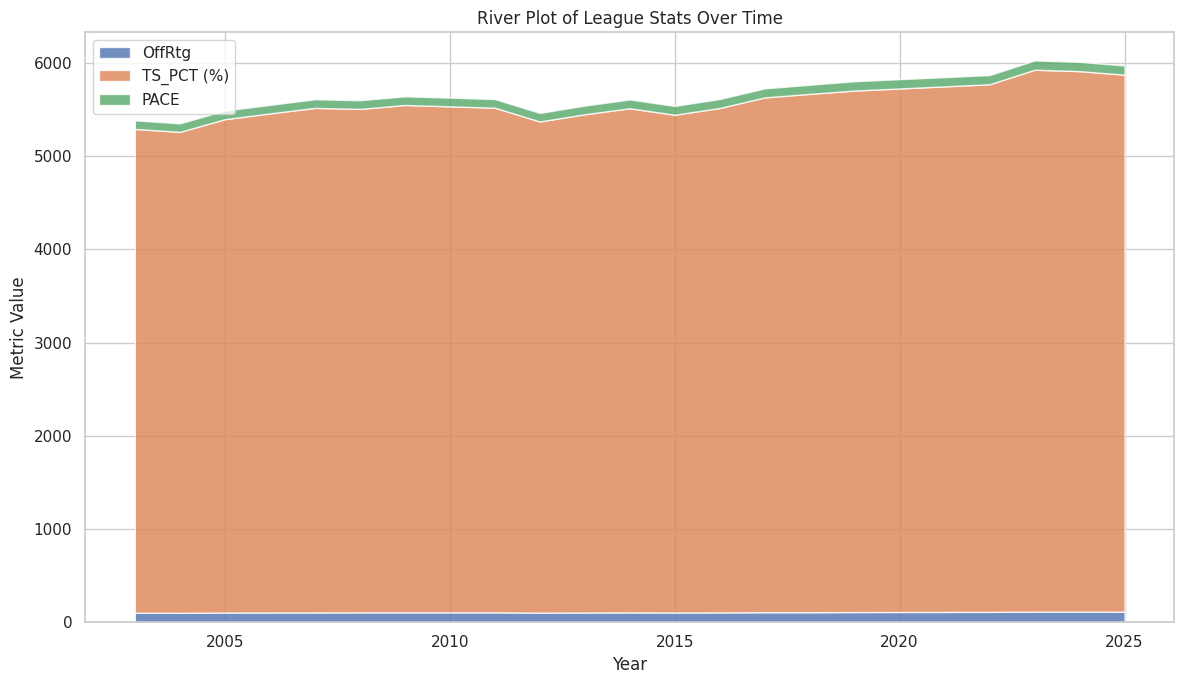

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv")  # Update path if needed
df['Year'] = df['Year'].astype(int)

# Group for league-wide averages
league = df.groupby('Year')[['OffRtg', 'TS_PCT', 'PACE', 'PIE']].mean().reset_index()

### 🎨 1. RIVER PLOT (stacked area)
plt.figure(figsize=(12, 7))
plt.stackplot(league['Year'],
              league['OffRtg'],
              league['TS_PCT'] * 100,  # scale for readability
              league['PACE'],
              labels=['OffRtg', 'TS_PCT (%)', 'PACE'],
              alpha=0.8)
plt.title('River Plot of League Stats Over Time')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



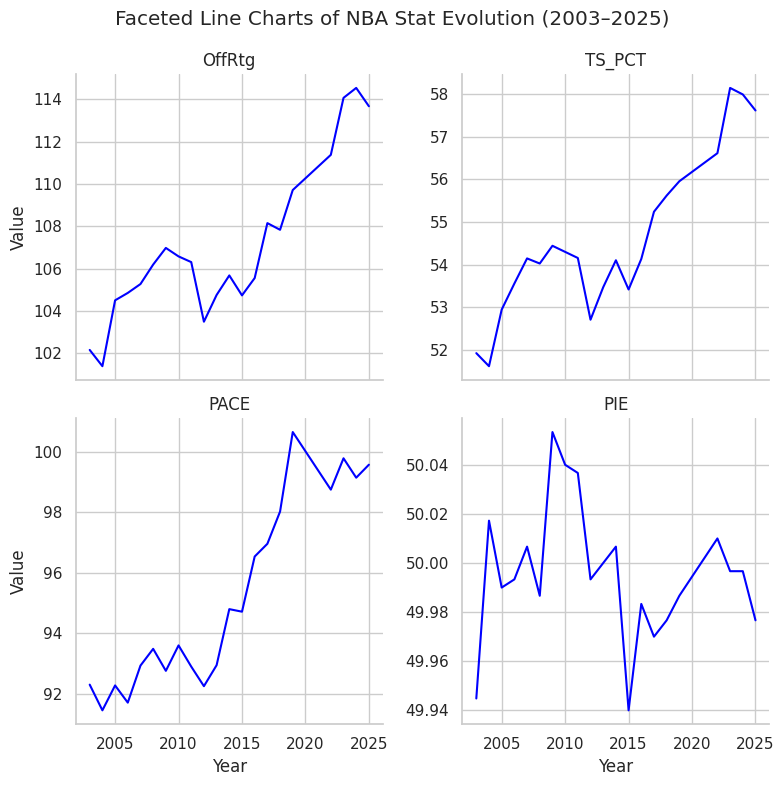

In [4]:
### 🧩 2. FACETED LINE PLOTS (separate panel per stat)
melted = league.melt(id_vars='Year', var_name='Stat', value_name='Value')

g = sns.FacetGrid(melted, col='Stat', col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Value', color='blue')
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Faceted Line Charts of NBA Stat Evolution (2003–2025)')
plt.show()

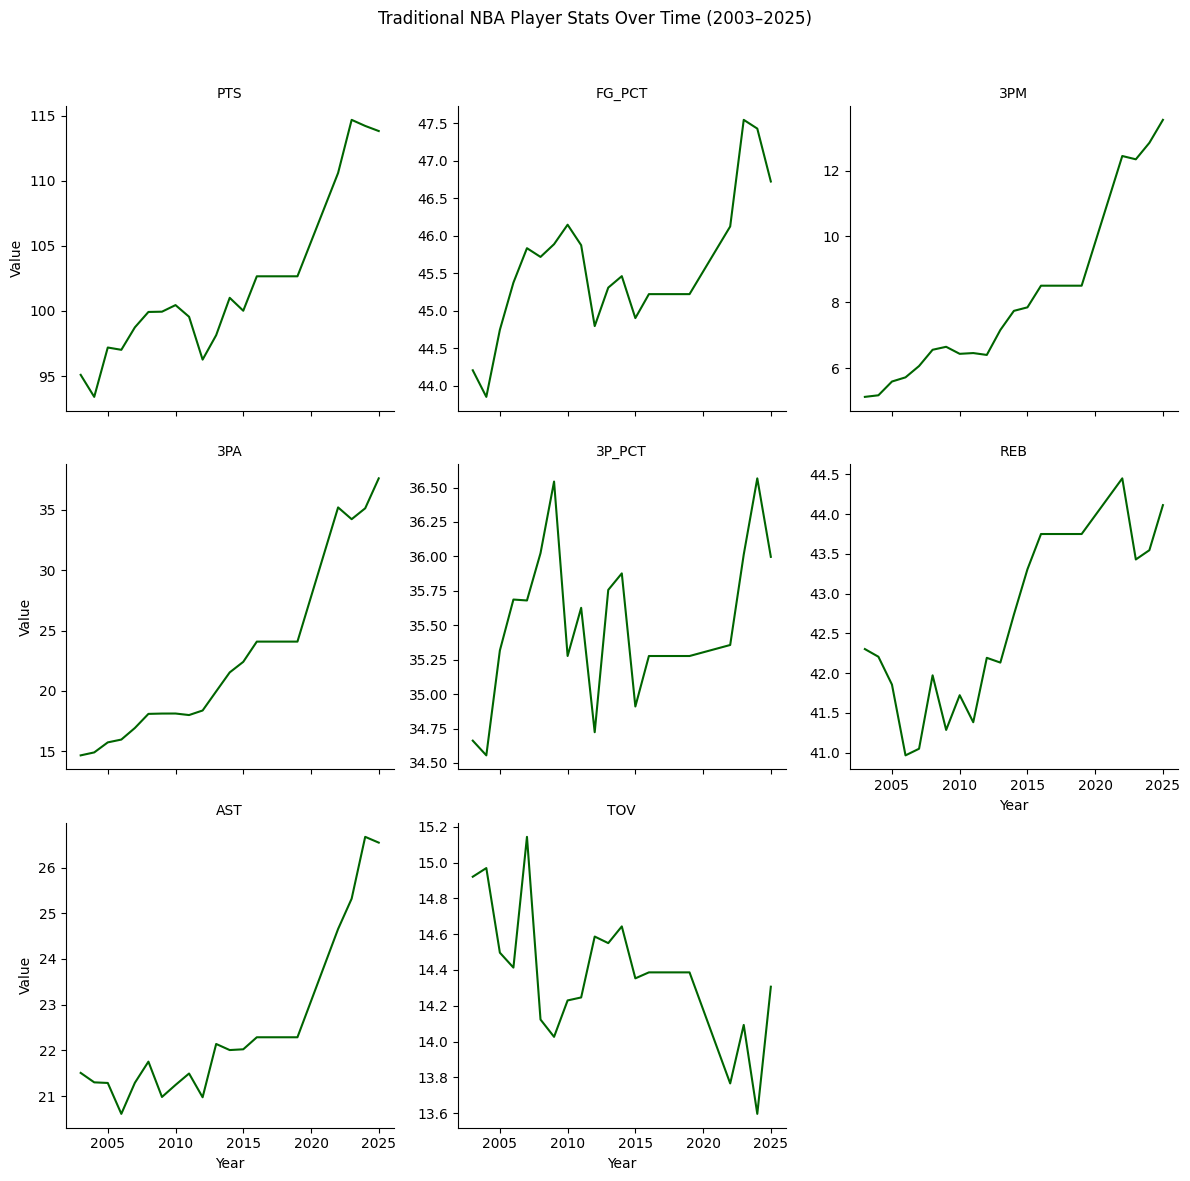

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load player data
df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_team_traditional_stats.csv")
df['Year'] = df['YEAR'].astype(int)

# Select traditional stats of interest
trad_stats = ['PTS', 'FG_PCT', '3PM', '3PA', '3P_PCT', 'REB', 'AST', 'TOV']

# Group by year (league-wide player averages)
league_avg = df.groupby('Year')[trad_stats].mean().reset_index()

# Melt for faceting
melted = league_avg.melt(id_vars='Year', var_name='Stat', value_name='Value')

# Faceted plot
g = sns.FacetGrid(melted, col='Stat', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Value', color='darkgreen')
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Traditional NBA Player Stats Over Time (2003–2025)')
plt.show()


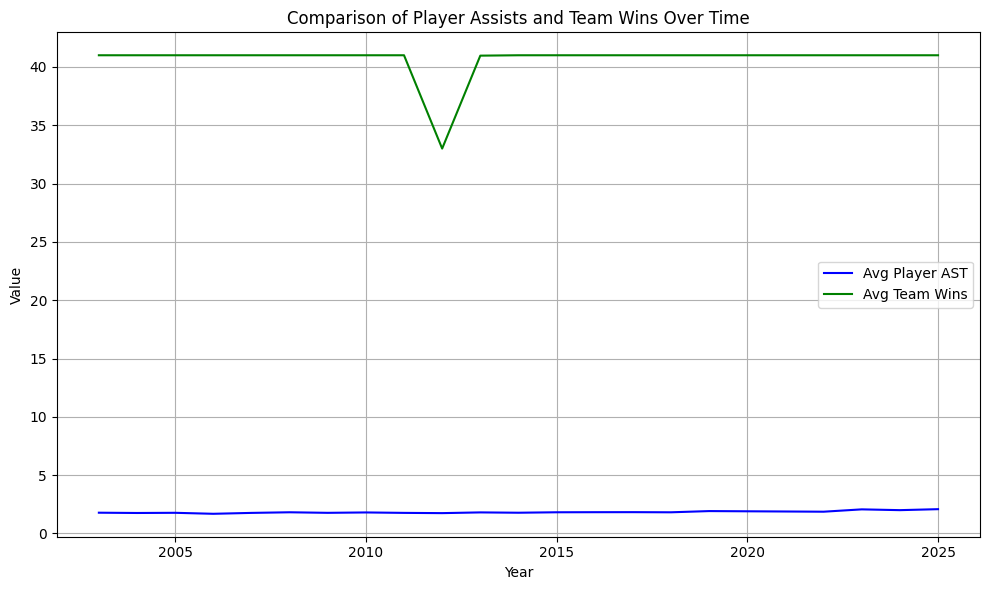

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load player and team data
player_df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_player_traditional_stats.csv")
team_df = pd.read_csv("/workspaces/Data-Science-Final-Project/NBA/data/official_team_traditional_stats.csv")

# Ensure proper Year format
player_df['Year'] = player_df['YEAR'].astype(int)
team_df['Year'] = team_df['YEAR'].astype(int)

# Step 1: Aggregate player data - average assists per year
player_ast = player_df.groupby('Year')['AST'].mean().reset_index(name='Player_AST')

# Step 2: Aggregate team data - average wins per year
team_wins = team_df.groupby('Year')['W'].mean().reset_index(name='Team_Wins')

# Step 3: Merge both dataframes on Year
combined_df = pd.merge(player_ast, team_wins, on='Year')

# Step 4: Plot the trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Year', y='Player_AST', label='Avg Player AST', color='blue')
sns.lineplot(data=combined_df, x='Year', y='Team_Wins', label='Avg Team Wins', color='green')
plt.title('Comparison of Player Assists and Team Wins Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()